In [1]:
#读取数据
import numpy as np
NEW_FILE2 = 'D:/datasets/solar/new_data/new_data2.csv'
date, radiation, power = np.loadtxt(NEW_FILE2,delimiter=',',skiprows=1,usecols=(0,5,-1),unpack = True)
#power = power/250
radiation = radiation/3
divide = power/radiation
#日期、辐射、功率
def switch(apple):
    if type(apple) != str:
        if apple < 305:year = 2016;apple+=61
        elif apple< 670:year = 2017;apple+=61
        else:year = 2018;apple+=61
        apple%=365
        if apple == 0:month = 12;day = 31
        elif apple <= 31:month = 1;day = apple
        elif apple <= 59:month = 2;day = apple-31
        elif apple <= 90:month = 3;day = apple-59
        elif apple <= 120:month = 4;day = apple - 90
        elif apple <= 151:month = 5;day = apple - 120
        elif apple <= 181:month = 6;day = apple - 151
        elif apple <= 212:month = 7;day = apple - 181
        elif apple <= 243:month = 8;day = apple - 212
        elif apple <= 273:month = 9;day = apple - 243
        elif apple <= 304:month = 10;day = apple - 273
        elif apple <= 334:month = 11;day = apple - 304
        elif apple <= 365:month = 12;day = apple - 334
        return '%d/%d/%d'%(year,month,day)
        
    elif type(apple) == str:
        a = apple.split('/')
        year = int(a[0])
        month = int(a[1])
        day = int(a[2])
        number = 0
        if month <= 2:number+=(month-1)*31+day   
        elif month <= 7:
            if month%2 == 1:number+=59+day+(month-3)*30.5
            elif month%2 == 0:number+=90+day+(month-4)*30.5
        else:
            if month%2 == 0:number+=212+day+(month-8)*30.5
            elif month%2 == 1:number+=243+day+(month-9)*30.5
        if year == 2016:number-=61
        elif year == 2017:number+=304
        elif year == 2018:number+=669
        return number 

In [2]:
Ever_Day_Power = []
Ever_Day_Radiation = []
Ever_Day_Divide = []
Date = []

for i in range(894):
    Ever_Day_Power.append(np.mean(power[i*21:i*21+21]))
    Ever_Day_Radiation.append(np.mean(radiation[i*21:i*21+21]))
    Ever_Day_Divide.append(np.mean(divide[i*21:i*21+21]))
    Date.append(date[i*21])
Ever_Day_Power = np.array(Ever_Day_Power)
Ever_Day_Radiation = np.array(Ever_Day_Radiation)
Ever_Day_Divide = np.array(Ever_Day_Divide)
Date = np.array(Date)

In [16]:
from sklearn.cluster import DBSCAN
Ever_Day_Divide = np.reshape(Ever_Day_Divide,(894,1))#每日功率辐射比
Data1 = np.c_[Ever_Day_Power,Ever_Day_Radiation] #每日功率、辐射
db = DBSCAN(eps = 17,min_samples=3).fit(Data1)
labels = db.labels_
Data = np.c_[Date,labels]
count = 0
for row in Data:
    if row[1] != 0:
        print(switch(row[0]),row[0])
        count+=1
print(count)

2016/4/29 58.0
2016/5/1 60.0
2016/5/5 64.0
2016/5/6 65.0
2016/5/7 66.0
2016/5/8 67.0
2016/5/19 78.0
2016/5/23 82.0
2016/5/30 89.0
2016/6/2 92.0
2016/7/7 127.0
2016/7/13 133.0
2016/8/23 174.0
2016/8/29 180.0
2016/8/30 181.0
2016/9/13 195.0
2016/9/17 199.0
2016/9/28 210.0
2016/12/6 279.0
2016/12/8 281.0
2016/12/21 294.0
2016/12/26 299.0
2017/4/17 411.0
2017/4/18 412.0
2017/6/25 480.0
2017/6/26 481.0
2017/6/28 483.0
2017/9/30 577.0
2017/10/6 583.0
2017/11/11 619.0
2017/12/11 649.0
2017/12/12 650.0
2018/2/15 715.0
2018/3/8 736.0
2018/4/11 770.0
2018/4/26 785.0
2018/8/2 883.0
2018/9/21 933.0
38


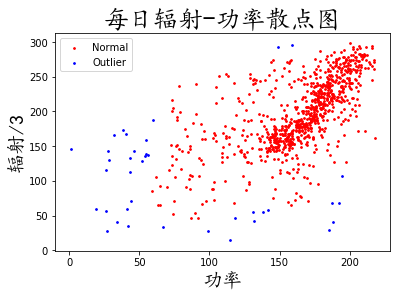

In [17]:
import matplotlib.pyplot as plt
pltdata = np.c_[Data,Data1]
class1 = []
class2 = []
for row in pltdata:
    if row[1] == 0:
        class1.append([row[2],row[3]])
    else:
        class2.append([row[2],row[3]])
class1 = np.array(class1)
class2 = np.array(class2)
plt.scatter(class1[:,0],class1[:,1],s = 3,c = 'r',label = 'Normal')
plt.scatter(class2[:,0],class2[:,1],s = 3,c = 'b',label = 'Outlier')
plt.xlabel('功率',fontproperties = 'Kaiti',fontsize = 20)
plt.ylabel('辐射/3',fontproperties = 'Kaiti',fontsize = 20)
plt.title('每日辐射-功率散点图',fontproperties = 'Kaiti',fontsize = 25)
plt.legend()
plt.show()